# __Supervised Learning: Regression__

* Types of Regression
    * Linear Regression
      * Simple Linear Regression
        - Train-Test Split
      * Multiple Linear Regression
        - Overfitting and Underfitting
    * Non-Linear Regression
      * Polynomial Regression
* Model Evaluation and Validation
    * Cross-Validation Techniques
    * Performance Metrics for Regression
      * Mean Squared Error (MSE)
      * Root Mean Squared Error (RMSE)
      * Mean Absolute Error (MAE)
      * R-Squared
* Regularization Techniques
    * Lasso Regression
    * Ridge Regression
    * ElasticNet Regression
* Hyperparameter Tuning
    * GridSearchCV
    * RandomSearchCV

## __Regression__ ##

Regression in machine learning refers to a supervised learning technique where the goal is to predict a continuous numerical value based on one or more independent features. It finds relationship between variables so that predictions can be made. We have:

1. __Dependent Variable (Target)__: The variable we are trying to predict.
2. __Independent Variable (Features)__ : The input variables that influence the prediction.

#### __Types of Regression__

Regression types can be classified into two categories: linear and non-linear.

__Linear Regression:__ Linear regression finds a straight-line relationship between the dependent variable and one or more independent variables.

__Non-Linear Regression:__ Non-linear regression finds a relationship between the dependent variable and independent variables using a curve or a more complex shape.

#### __Applications of Regression__

1. Oil and Gas Industry: Various types of data are collected in the oil and gas industry from the surface and subsurface to understand production and sale processes. Linear and non-linear regression models forecast global oil production.

2. Marketing: In marketing, linear regression helps analyze the effectiveness of advertising campaigns, predict sales based on marketing spend, and segment customers based on demographic data.

3. Retail: Linear regression is utilized in retail for demand forecasting, inventory management, pricing optimization, and customer analytics.

4. Healthcare: Linear regression is applied in healthcare for predicting patient outcomes, analyzing the relationship between medical variables and disease progression, and planning healthcare resources.

5. Real Estate: In the real estate industry, linear regression predicts property prices based on factors such as location, size, amenities, and economic indicators.

### __Linear Regression__

**Linear Regression** refers to a supervised learning algorithm used to predict a continuous target variable by modeling its relationship with one or more independent variables through a linear equation.

- It predicts a continuous dependent variable based on one or more independent variables.
- It uses the least squares criterion to estimate the coefficients of the regression equation..
- It can be applied only if there is a linear relationship between the variables.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Linear.png" width = 400 height = 400 />

In this case, the dependent variable is continuous, and the independent variables can be either continuous or discrete.
The relationship between a dependent variable (y) and one or more independent variables (x) is established using a best-fit straight line, also known as the regression line.

There are __two types of linear regression__:
- Simple linear regression
- Multiple linear regression

### __Simple Linear Regression__ ###

Simple linear regression models the relationship between one independent variable and the dependent variable as a straight line.

The equation for Simple Linear Regression is:

 $$ y = \beta_0 + \beta_1x $$ 
 
 $$or$$

 $$ y = mx + c $$

where:

- $y$ is the dependent variable
- $x$ is the independent variable
- $β_0$ or $c$ is the intercept
- $β_1$ or $m$ is the slope

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/Simple_linear_regression.jpg" width=500 height=500 />

### __Multiple Linear Regression__ ###

Multiple linear regression models the relationship between two or more independent variables/predictors/features and the dependent variable as a straight line.

The equation for Multiple Linear Regression:

 $$ {y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_ n $$

- $ x_1, x_2, \ldots, x_n $ are the predictor variables,
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the coefficients for each predictor.


<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/multiple_linear_regression.jpg" width=500 height=500 />

### Let us see how to fit the linear regression model on a dataset.

#### __Step 1: Import the required libraries__

In [92]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv("tvmarketing.csv")

In [94]:
data.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [95]:
data.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [96]:
# Display a summary of the DataFrame, including the column names, non-null count, and data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [101]:
data.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


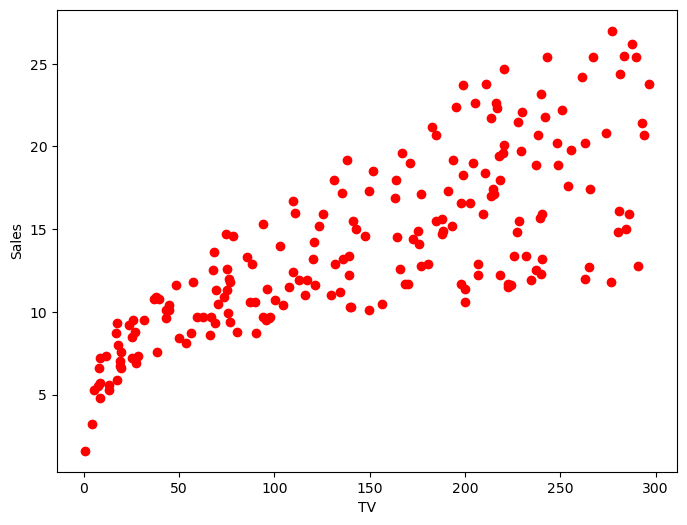

In [104]:
plt.figure(figsize = (8,6))
plt.scatter(x = "TV", y = "Sales", data = data, color = 'red', marker = 'o')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [105]:
# First column containing TV data

data.iloc[:, 0]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [107]:
# Second column containing Sales data

data.iloc[:, 1]

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [110]:
# df.iloc[].values returns the values in a 1D array

data.iloc[:, 0].values

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

#### __Step 2: Fit the Linear Regression Model__

Here, we need to **Train and test the model**.

- Define the features and the target variables.
- Here, `X` is assigned to all the rows in the first column of the dataset.
- `y` is assigned to all the rows of the second column of the same dataset.

#### __First Split ---> Vertical Split, separating the `X` & `y`__

Performing vertical split of the dataset by segregating Independent Variables/Features (X) and Dependent/Target variable (y).

In [114]:
# Extract the feature(s) from the DataFrame (X)
X = data.iloc[:,0:1].values

# Extract the target variable from the DataFrame (y)
y = data.iloc[:,1].values

In [116]:
X[:5]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8]])

In [118]:
y[:5]

array([22.1, 10.4,  9.3, 18.5, 12.9])

#### __Second Split ---> Horizontal Split, separating the "Train & Test" data from the dataset__

**Perform train-test split**

Train-test split is a technique in machine learning used to evaluate a model's performance by dividing the data into two parts: a training set and a test set. The model is trained on the training set, learning patterns and parameters, and then evaluated on the test set to see how well it generalizes to new, unseen data.

**Note:** This train-test data split will be used for other implementations as well.

In [121]:
# Performing horizontal split of the dataset by dividing it into 2 parts - Train set and Test set
# Commonly used industry standards are 70:30 or 80:20 train-test split
# Done using sklearn train_test_split function
# Import train_test_split function from sklearn's model_selection module

from sklearn.model_selection import train_test_split

Allowed inputs in `train_test_split()` are lists, numpy arrays, scipy-sparse matrices or pandas dataframes. In this implementation `X` and `y` will be passed as arrays of corresponding values

In [124]:
# Split the data into training and testing sets
# Here, test_size is the test data size = 0.3 or 30%
# random_state is the seed variable for the random data generation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

This code splits the dataset (X, y) into a training set (70%) and a test set (30%).

As you may have noticed, we’ve been setting the random_state parameter in our examples. This parameter is the seed used by the random number generator. Setting a seed ensures that the splits you generate are reproducible. If you don’t set a seed, you might get different splits every time you run the code, which can make your results hard to replicate.
it

In [127]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

140
60
140
60


#### __Should you perform Standardization / Normalization before or after the split of training and test data?__

Normalization / Standardization should be done after splitting the data into train and test sets. The reason is to avoid any data leakage.

__Data Leakage:__ Data leakage happens when information from outside the training set is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the model being constructed.

The testing data points represent real-world data. Feature normalization (or data standardisation) of the explanatory (or predictor) variables is a technique used to center and normalise the data by subtracting the mean and dividing by the standard deviation. If you take the mean and variance of the whole dataset, you will be introducing future information into the explanatory variables (i.e. the mean and std. deviation). 

- First, let us see if linear regression works on this data.
- From **sklearn.linear_model**, import the linear regression function.
- Assign **LinearRegression()** to the variable **lin_reg**.
- Next, fit the model on the training data `X_train` and `y_train`.

In [131]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance/object of the LinearRegression class
lin_reg = LinearRegression()

# Pass the X and y training set data
lin_reg.fit(X_train,y_train)

LinearRegression()

- Fit the linear regression model to the given dataset.
- Visualize the fitted data using a scatter plot.
- Define a function named **viz_linear** to display the X_test and y_test values as green points on a graph, and illustrate the fitted regression line in blue.
- Provide the appropriate X and y axis labels along with a suitable title for the plot.
- Then call the following function to create the plot.

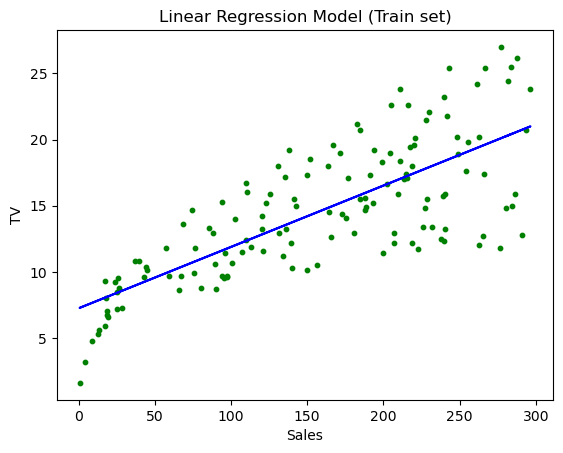

In [134]:
# Visualize the linear regression model for the train set
plt.scatter(X_train, y_train, s=10, color='green')
# Using training set line for comparison
plt.plot(X_train, lin_reg.predict(X_train), color='blue')  
plt.title('Linear Regression Model (Train set)')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

In [136]:
# Visualize the linear regression model for the test set
def viz_linear():
    plt.scatter(X_test, y_test, s=10, color='green')
    # Using training set line for comparison
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')  
    plt.title('Linear Regression Model (Test set)')
    plt.xlabel('Sales')
    plt.ylabel('TV')
    plt.show()


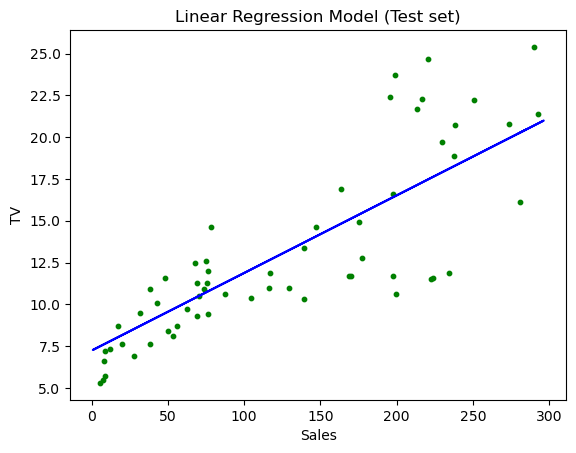

In [138]:
viz_linear()

In [140]:
# Intercept

lin_reg.intercept_

7.2394598307511435

In [142]:
# Slope of the line

lin_reg.coef_

array([0.0464078])

__Observation:__

- The plot shows a positive linear relationship between Sales and TV, where the blue regression line indicates the model's predictions. The green data points are generally close to the line, suggesting the model fits the data reasonably well, though some variability exists.

#### __Linear Regression Equation for the above dataset__

$ Sales = 0.0464078(TV) + 7.2394598307511435 $

#### __Step 3: Finding the training and testing accuracy of the model__

In [147]:
# Import necessary libraries for performance metrics

from sklearn.metrics import mean_squared_error, r2_score

#### __Training Phase Evaluation__

In [150]:
# Evaluate the model on the training set
# Here, we get predicted value of y_train based on X_train values

y_train_pred = lin_reg.predict(X_train)

In [152]:
# Evaluate the Mean Squared Error of the train data
# Evaluated by passing y_train and model predicted values of y_train which is y_train_pred

mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

11.189103289351676

In [154]:
# Evaluate the R-squared score (to find accuracy) of the train data
# Evaluated by passing y_train and model predicted values of y_train which is y_train_pred

r2_train = r2_score(y_train, y_train_pred)
r2_train

0.5736021199591975

####  __Testing Phase Evaluation__

This phase is also called __Inferencing__.

In [157]:
# Evaluate the model on the test set
# Here, we get predicted value of y_test based on X_test values

y_test_pred = lin_reg.predict(X_test)

In [159]:
# Evaluate the Mean Squared Error of the test data
# Evaluated by passing y_test and model predicted values of y_test which is y_test_pred

mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

8.970991242413616

In [161]:
# Evaluate the R-squared score (to find accuracy) of the test data
# Evaluated by passing y_test and model predicted values of y_test which is y_test_pred

r2_test = r2_score(y_test, y_test_pred)
r2_test

0.6714477229302764

## __Overfitting and Underfitting__

When developing machine learning models, achieving the right balance between complexity and simplicity is crucial. This balance is covered in the concepts of overfitting and underfitting.

### __Bias__

Bias refers to the difference between a model's predictions and the actual distribution of the value it tries to predict. 
- Models with high bias oversimplify the data distribution rule/function, resulting in high errors in both the training outcomes and test data analysis results.
- One common way to calculate bias is to use performance metrics such as mean squared error (MSE) or mean absolute error (MAE), which determine the difference between the predicted and real values of the training data.
- It is a systematic error that occurs due to wrong assumptions in the machine learning process. 

<img src="https://serokell.io/files/ao/aoyw6se5.Bias-Variance_Tradeoff_in_ML_pic1.png" width = 400 height = 400 />

https://serokell.io/blog/bias-variance-tradeoff

The level of bias in a model is heavily influenced by the quality and quantity of training data involved:-
- Can be caused due to insufficient data.
- Choosing an inappropriate model.

### __Variance__

Variance stands in contrast to bias; it measures how much a distribution on several sets of data values differs from each other. The most common approach to measuring variance is by performing cross-validation experiments and looking at how the model performs on different random splits of your training data.
- In machine learning variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data.
- More specifically, variance is the variability of the model that how much it is sensitive to another subset of the training dataset. i.e. how much it can adjust on the new subset of the training dataset.
- A model with a high level of variance depends heavily on the training data and, consequently, has a limited ability to generalize to new, unseen figures.
- Nonlinear machine learning algorithms often have high variance due to their high flexibility.

  
<img src="https://serokell.io/files/lx/lxc6dmk0.Bias-Variance_Tradeoff_in_ML_pic3.png" width = 400 height = 400 />

### __Bias-Variance Scenarios__

1. __Low bias, low variance:__ Ideal model. r2_score for the train data as well as the test data is high.
2. __Low bias, high variance:__ Results in `Overfitting`. r2_score for the train data is high where as for the test data is low.
3. __High bias, low variance:__ Results in `Underfitting`. r2_score for the train data as well as the test data is low.
4. __High bias, high variance:__ Predictions are inaccurate and inconsistent. 

<img src="https://serokell.io/files/qs/qsl24u59.Bias-Variance_Tradeoff_in_ML_pic5.png" width=500 height=500 />

- Bias decreases with model complexity. So, for simple model bias is high, but for a complex model, bias is low.
- Variance increases with model complexity. So, for a simple model variance is low, but for a complex model, variance is high.
- So, we need to find an optimal point for both the bias and variance (`Bias - Variance Tradeoff`).
- `Total error = Bias + Variance`


<img src="https://serokell.io/files/y0/y08hu0d1.Bias-Variance_Tradeoff_in_ML_pic6.png" width=600 height=600 />

#### __Overfitting__

- Overfitting occurs when a model learns the noise and details in the training data too well to the extent that it negatively impacts its performance on new unseen data.
- Sign: High accuracy on training data but poor accuracy on test data.
- Cause: Model is too complex (too many parameters).
- Bias is low, but Variance is high.

#### __Underfitting__
- Underfitting happens when a model is too simple to capture the underlying pattern of the data.
- Sign: Poor accuracy on both training and test data.
- Cause: Model is too simple (too few parameters).
- Bias is high, but Variance is low.
  
#### __Bias-Variance Tradeoff__
- __Bias:__ Error due to overly simplistic assumptions in the learning algorithm. High bias can cause underfitting.
- __Variance:__ Error due to excessive complexity in the learning algorithm. High variance can cause overfitting.

#### __Tradeoff__
- Low Bias & High Variance: Model fits the training data very well but may fail to generalize (overfitting).
- High Bias & Low Variance: Model does not fit the training data well and misses the underlying trend (underfitting).
- Optimal Tradeoff: Finding a balance where the model performs well on both training and test data, minimizing overall error.
  
Understanding and managing the bias-variance tradeoff is key to building models that generalize well to unseen data.

#### __Let's look at how to check for overfitting or underfitting of the model__

- __Case 1__: `r2_train` > `r2_test` -> __Overfitting__. Here, Variance is very high. Happens in case of complex model.
- __Case 2__: `r2_train` ~ `r2_test` -> Both are almost equal and are very less. __Underfitting__. Happens due to:
  - If we have a simple and lazy model.
  - We did not have enough data to learn from.

In [322]:
mse_train

11.189103289351676

In [324]:
mse_test

8.970991242413616

In [326]:
r2_train

0.5736021199591975

In [328]:
r2_test

0.6714477229302764

In [330]:
# Print the metrics
print("Training Set Mean Squared Error:", mse_train)
print("Test Set Mean Squared Error:", mse_test)
print("Training Set R² Score:", r2_train)
print("Test Set R² Score:", r2_test)
print("------------------------------------------")

# Check for overfitting or underfitting
if mse_train < mse_test or r2_train > r2_test:
    if abs(r2_train - r2_test) > 0.1:
        print("Model may be overfitting to the training data.")
    else:
        print("Model performs reasonably well but check for slight overfitting.")
elif mse_train > mse_test and r2_train < r2_test:
    print("Model may be underfitting, consider increasing model complexity.")
else:
    print("Model has a balanced fit on both training and testing datasets.")

Training Set Mean Squared Error: 11.189103289351676
Test Set Mean Squared Error: 8.970991242413616
Training Set R² Score: 0.5736021199591975
Test Set R² Score: 0.6714477229302764
------------------------------------------
Model may be underfitting, consider increasing model complexity.


#### __Observation__

 Mean Squared Error (MSE) and R-squared (R²) values are calculated for both training and test datasets.

 - MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value.
 - R² provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.

Overfitting: The model performs well on the training data but poorly on the test data (higher R² on training or lower MSE on training compared to testing).

Underfitting: The model performs poorly on both training and test data, or better on the test data compared to the training data, which could suggest that the model is too simple.

## __Non-linear Regression__

### __Polynomial Regression__

**Polynomial Regression** is a subset of linear regression that includes polynomial terms.
The relationship between an independent variable (x) and a dependent variable (y) is modeled as an nth-degree polynomial.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_04/Polynomial.png" width=600 height=600 />

- Polynomial regression is also called as the special case of multiple linear regression. Some polynomial terms are added to the multiple linear regression equation to convert into polynomial regression.
- It is a linear model with some modifications made to increase its accuracy.
- The dataset used in polynomial regression for training is non-linear.

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/linear__regression.png" width=600 height=600 />

- From the above figure, it is seen that the straight line is unable to capture the patterns in the given data.
- To achieve a higher-order equation that captures complex data patterns, the powers of the original features can be added as new features.
- The following graph is the result after applying polynomial regression:

<img src="https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/polynomial__regression.png" width=600 height=600 />

- It provides the best approximation of the relationship between a dependent and an independent variable.
- It captures most data points and decreases the error between the actual and the predicted values.


### Let us see how to fit polynomial regression on a dataset.


- First, import the relevant libraries.
- Next, assign the **PolynomialFeatures** of degree 4 to the variable **poly_features**.
- Fit the values of X_test and X_train  and assign them to the variable **X_test_poly** and **X_train_poly**.
- Finally, get the linear regression function and assign it to the variable **pol_features**.
- Dataset used for this exercise is `tvmarketing.csv`

In [163]:
# Import the PolynomialFeatures class from scikit-learn's preprocessing module

from sklearn.preprocessing import PolynomialFeatures

In [165]:
# Perform train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [167]:
X_train[:5]

array([[ 36.9],
       [ 31.5],
       [142.9],
       [209.6],
       [215.4]])

In [203]:
# Create PolynomialFeatures features transformer with degree 4
# Create new feature set using fit_transform on X_train
# Apply the same transformation (feature set) on X_test

poly_features = PolynomialFeatures(degree = 4)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [205]:
X_train_poly[:5]

array([[1.00000000e+00, 3.69000000e+01, 1.36161000e+03, 5.02434090e+04,
        1.85398179e+06],
       [1.00000000e+00, 3.15000000e+01, 9.92250000e+02, 3.12558750e+04,
        9.84560062e+05],
       [1.00000000e+00, 1.42900000e+02, 2.04204100e+04, 2.91807659e+06,
        4.16993145e+08],
       [1.00000000e+00, 2.09600000e+02, 4.39321600e+04, 9.20818074e+06,
        1.93003468e+09],
       [1.00000000e+00, 2.15400000e+02, 4.63971600e+04, 9.99394826e+06,
        2.15269646e+09]])

In [207]:
# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Create an instance/object of the LinearRegression class
poly_model = LinearRegression()

# The linear regression model is trained using tranformed X_train data and the y_train data
poly_model.fit(X_train_poly, y_train)

LinearRegression()

1. **Create Polynomial Features:** The PolynomialFeatures transformer is configured to generate polynomial features up to the 4th degree.

2. **Transform Training Data:** `fit_transform` is used on X_train to generate a new feature set that includes polynomial features and interactions.

3. **Transform Test Data:** `transform` (corrected from fit_transform) is used on X_test to apply the same transformation derived from X_train.

4. **Train the Model:** The linear regression model is trained using the transformed training data (X_train_poly) and the target values (y_train).

- So, you have fitted the polynomial regression on the given data. Now, we need to predict the values using the model.

In [210]:
# Predicted values on the training and testing set

y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

- Create a variable **X_range** to create a continuous range of values for the independent variable (X) that spans from the minimum to the maximum values found in both the training and test datasets. This range is used to generate smooth predictions for plotting the polynomial regression curve.

- Then, call the function to get the scatter plot with a blue line showing how the line fits the given data points.

In [231]:
X_range = np.arange(min(np.min(X_train), np.min(X_test)), max(np.max(X_train), np.max(X_test)), 0.1)
X_range = X_range.reshape((len(X_range), 1))

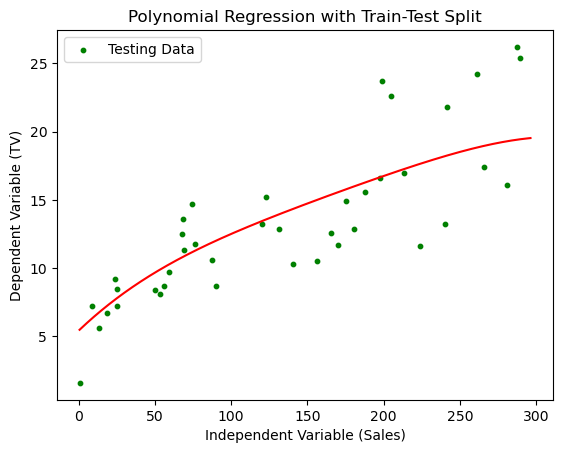

In [233]:
# Plot the results

plt.scatter(X_test, y_test, s=10, label='Testing Data', color='green')
plt.plot(X_range, poly_model.predict(poly_features.transform(X_range)),color='red')
plt.xlabel('Independent Variable (Sales)')
plt.ylabel('Dependent Variable (TV)')
plt.title('Polynomial Regression with Train-Test Split')
plt.legend()
plt.show()

__Observation:__

- As you can see, the regression line is able to fit majority of the data points.
- You can infer from the above implementation that non-linear inputs require non-linear models, such as the polynomial model.

In [163]:
# Evaluate the Mean Squared Error of the train data

mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

10.251041183933024

In [165]:
# Evaluate the R-squared score (to find accuracy) of the train data

r2_train = r2_score(y_train, y_train_pred)
r2_train

0.6026681059369929

In [169]:
# Evaluate the Mean Squared Error of the test data

mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

10.392591483868882

In [167]:
# Evaluate the R-squared score (to find accuracy) of the test data

r2_test = r2_score(y_test, y_test_pred)
r2_test

0.6697561111524608

In [179]:
# Slope of the curved line (4 degrees)

poly_model.coef_

array([ 0.        ,  0.10680106, -0.00052426,  0.00000193, -0.        ])

In [ ]:
# Intercept

poly_model.intercept_

In [177]:
np.set_printoptions(suppress = True)

#### __Polynomial Regression Equation for the above dataset__

$ Sales = 0(TV) + 0.10680106(TV)^1 - 0.00052426(TV)^2 + 0.00000193(TV)^3 -0(TV)^4 $